# Overview

This week we'll get started on modern network science. We'll focus on two key results that kick-started a revolution in our understanding of networks.

* Problems with random networks as models for real networks and the Watts-Strogatz model
* Scale-free networks and the Barabasi-Albert model

In addition to this, we will also talk about the 
* Configuration model for creating random networks.

But before we can get started, there's the bookkeeping stuff, the admin things. Do watch it - the material below tells you about key elements of how to do well in class, assignments and stuff.

And the good news is that after today, we can take it easy with admin stuff for a while. We'll restart this aspect when we get closer to the project assignments that we finish the class with.

# Part 0.0: Two surveys to help improve this course

I want to give you the best-possible course. To do this, I collect data from you while this course is running. Today, I will collect 2 surveys.

### Survey 1:
This survey will help me understand how the first couple of weeks affected your perceptions of Networks and this course. Please go to [DTU learn](https://learn.inside.dtu.dk/) -> Activities -> Surveys and complete the survey "My thoughts on Social Graphs and Interactions II" and help me improve this course.

### Running evaluation 1
I want to hear your thoughts on the way we are running this course so that I can improve the course while you are still taking it. Please think of what you like and dislike about the course and share your constructive suggestions with me on [DTU learn](https://learn.inside.dtu.dk/) -> Activities -> Surveys -> "Running evaluation of course I"

> You can hear me describe the thoughts behind this evaluation in this [video lecture](https://www.dropbox.com/scl/fi/ytursoj8rls423bcnpz6q/RunningEvaluationI.mp4?rlkey=58093lleggkpha85dtubxq1kf&dl=0). Link: https://www.dropbox.com/scl/fi/ytursoj8rls423bcnpz6q/RunningEvaluationI.mp4?rlkey=58093lleggkpha85dtubxq1kf&dl=0

**_Thanks so much for helping us improve the course!_**


# Part 0.1: The admin stuff 
### (Why we use Peer Evaluations Edition)

We use the system [Peergrade.io](http://peergrade.io/) to get you better feedback and make you smarter. In the video below, I explain why that is the case. There are a lot of good reasons that peer evaluations are great, so watch [the video](https://www.dropbox.com/scl/fi/r4liy92ell1dkjq1ye9v4/AdminWeek3.mp4?rlkey=0coke8ubcmapkxbznrx3ndqc7&dl=0) :)

Link: https://www.dropbox.com/scl/fi/r4liy92ell1dkjq1ye9v4/AdminWeek3.mp4?rlkey=0coke8ubcmapkxbznrx3ndqc7&dl=0

# Part 1: Small world networks

Once again, we'll start with some lecturing. So it's time to [watch a little video](https://www.dropbox.com/scl/fi/8b65w8vkitxlgc3huzy6p/SmallWorlds.mp4?rlkey=are1v0hu7l42gau9qxbisuj1q&dl=0) to get you started.

> **_Video Lecture_**: Some properties of real world networks. Clustering and small paths. The Watts-Strogatz model.  Link: https://www.dropbox.com/scl/fi/8b65w8vkitxlgc3huzy6p/SmallWorlds.mp4?rlkey=are1v0hu7l42gau9qxbisuj1q&dl=0
> 

Next up is fun with reading the textbook. There's lots of goodies left in Chapter 3 that covers the stuff I've just covered in the video from a slightly different angle. 
> 
> *Reading*: For this part, we'll read the remaining part of *Network Science* Chapter 3, Section 3.5 - 3.10, with ***emphasis*** on 3.8 and 3.9\.
> 


> *Exercises*: Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook. 
> 
> * What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?
> * List the four regimes that characterize random networks as a function of $\langle k \rangle$.
> * According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?
> 

The next set of exercises departs from the book by presenting a little study of the Watts-Strogatz (WS) model. We're going to see just how few random links the WS model needs to dramatically shorten the path-lengths in the network. And while doing that, we'll practice using `networkx`, writing loops, and plotting nice figures.

> *Exercises*: WS edition.
> 
> * First, let's use `networkx` to play around with WS graphs. Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1,$ and  $1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.
> * Generate a lot of networks with different values of $p$. You will notice that paths are short when $p$ is close to one and they are long when $p = 0$. What's the value of $p$ for which the average shortest path length gets close to the short paths we find in a fully randomized network.
> * Let's investigate this behavior in detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add [errorbars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) to the plot. My version of the plot is below (since a picture's worth 1000 words).
> 

![Sune's version](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/ws.png)

In [1]:
import networkx as nx

N = 500
k = 4
p_values = [0.,0.1,1.]

for p in p_values:
    G = nx.watts_strogatz_graph(N,k,p)
    avg_shortest_path_length = nx.average_shortest_path_length(G)
    print(f"For p = {p}, the average shortest path length <d> = {avg_shortest_path_length}")

# When p=1, the network becomes fully randomized. 
# All the nodes get rewired randomly, removing the initial local clustering property of the network. 
# The network no longer has its small-world property and becomes similar to a random graph.

For p = 0.0, the average shortest path length <d> = 62.875751503006015
For p = 0.1, the average shortest path length <d> = 7.767991983967936
For p = 1.0, the average shortest path length <d> = 4.728993987975952


In [2]:
# Investigating the behavior of ⟨d⟩ with varying values of p:
# The fully randomized network corresponds to p=1. So, as p approaches 1, ⟨d⟩ should approach the value it has for p=1.

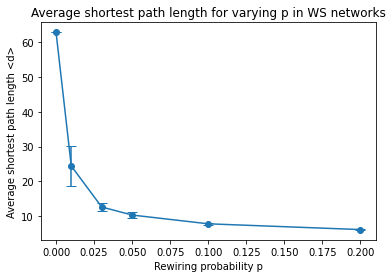

In [3]:
# Generating 50 networks for the given p values and plotting ⟨d⟩ with error bars:
import matplotlib.pyplot as plt
import numpy as np

p_values_detailed = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
avg_d_values = []
std_dev_values = []

for p in p_values_detailed:
    d_values = []
    for _ in range(50):  # 50 networks
        G = nx.watts_strogatz_graph(N, k, p)
        d_values.append(nx.average_shortest_path_length(G))
    avg_d_values.append(np.mean(d_values))
    std_dev_values.append(np.std(d_values))

# Plotting
plt.errorbar(p_values_detailed, avg_d_values, yerr=std_dev_values, fmt='-o', capsize=5)
plt.xlabel("Rewiring probability p")
plt.ylabel("Average shortest path length <d>")
plt.title("Average shortest path length for varying p in WS networks")
plt.show()

## Part 2: Scale-free networks

The text book uses two whole chapters on the scale free property. We'll try to cover it a bit faster. As always, [let's start by getting my take on the whole thing](https://www.dropbox.com/scl/fi/tn4dxkwe3w58qtdaxx077/BarabasiAlbert.mp4?rlkey=xw7fkwti5xdt81ej7p2ky22vr&dl=0).

> **_Video Lecture_**: The scale free property and the Barabasi-Albert Model. Link: https://www.dropbox.com/scl/fi/tn4dxkwe3w58qtdaxx077/BarabasiAlbert.mp4?rlkey=xw7fkwti5xdt81ej7p2ky22vr&dl=0
> 

And now it's time for you guys to read. Recall that Barabasi (who wrote the textbook) discovered power-laws.

> *Reading*: Now we dig into the extended history and and theory behind Scale-Free networks and the Barabasi-Albert Model.
> 
> * Chapter 4, Section 4.1 - 4.7\.
> * Chapter 5, section 5.1 - 5.5\.
> 

> *Exercises*: BA edition.
> 
> First a couple of questions to make sure that you've actually read the text.
> 
> * What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).
> * What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.
> 


### ANSWER
> a

**1. sublinear regime $(2<\gamma <3)$**
- well defined average degree but lacks characteristic scale for the degree distribution
- Most nodes have a smaller number of links but a few hubs have very large number of links

2. **Linear Regime $(\gamma = 3)$**
- behaves similarly to the sublinear regime but the presence of hubs is slightly less pronounced

3. **Superlinear Regime $(\gamma > 3)$**
- hubs are less dominant
- degree deviations from the mean degree are limited

>b

Non-linear preferential attachment is the prob that a new node connects to a node with degree k, which can be proportional to $k^{\alpha}$ where $\alpha$ is a tuneable parameter.

**1. sublinear regime $(\alpha < 1)$**
- new nodes prefer to attach to nodes with lower degrees making the network more tree-like
- Hubs are less likely to emerge

2. **Linear Regime $(\alpha = 1)$**
- standard Barabasi Albert model: nodes prefer to attach to others proportionally to their degree
- network shows clear scale free property with a few hubs accumulating many links

3. **Superlinear Regime $(\alpha > 1)$**
- new nodes strongly prefers to connect to hubs or nodes with higher degrees
- rich get richer effect (hubs get more dominant)
- degree distribution becomes more skewed, with pronounced hubs.


> We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success:
> 
> * First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).
> * Now add another node, connecting one of the existing nodes in proportion to their degree.
> * Keep going until you have a 100 node network.
>   * *Hint*: The difficult part here is connecting to each node according to their degree. The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). That list contains each node in proportion to its connections, thus drawing a random node from that list (e.g. using `random.choice`) corresponds to selecting a node with probability proportional to it's degree.
> * Plot the network. 
> * Add more nodes until you have a 5000 node network.
> * What's the maximum and minimum degree?
> * Now, bin the degree distribution using `numpy.histogram`.
> * Plot the distribution. Plot it with both linear and log-log axes.
> 
> ![Sune's version](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/ba.png)
> 
> Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ has fewer friends than their friends have, on average\*. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:
> 
> * Pick a node $i$ at random (e.g. use `random.choice`). [Find its degree](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html).
> * Find $i$'s [neighbors](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.Graph.neighbors.html?highlight=neighbors#networkx.Graph.neighbors). And calculate their average degree.
> * Compare the two numbers to check if it's true that $i$'s friends (on average) have more friends than $i$.
> * Do this 1000 times. How many out of those 1000 times is the friendship paradox true?
> 
> Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment. 
> 
> * Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words. *Hint*: To get started, take a look at the degree distribution, and study the number of connected components.
>

### Creating the Barabasi-Albert (BA) Model

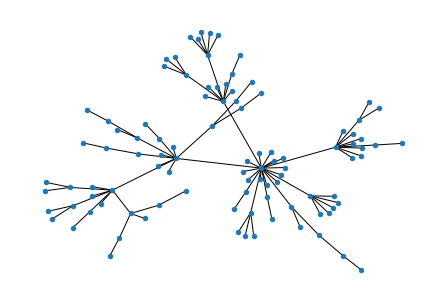

In [9]:
import random

# Initialize a graph with one link
G = nx.Graph()
G.add_edge(1,2)

def add_node_to_graph(G):
    # Flatten list of edges
    flat_edges = [item for sublist in G.edges() for item in sublist]
    
    # Select a node with probability proportional to its degree
    # i.e. nodes with higher degrees appear more times in flat_edges, they have a higher chance of being selected
    # this is the preferential attachment mechanism 
    selected_node = random.choice(flat_edges)
    new_node = max(G.nodes()) + 1
    G.add_edge(new_node, selected_node)

# Add nodes to the graph until we have 100 nodes
for i in range(98):  # Since we already have 2 nodes
    add_node_to_graph(G)

# Plotting the network with 100 nodes
nx.draw(G, node_size=20)
plt.show()

Maximum Degree: 144
Minimum Degree: 1


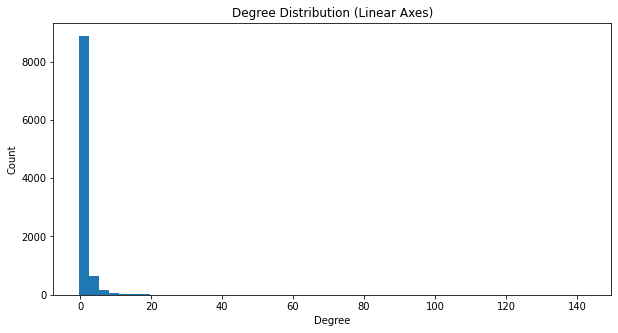

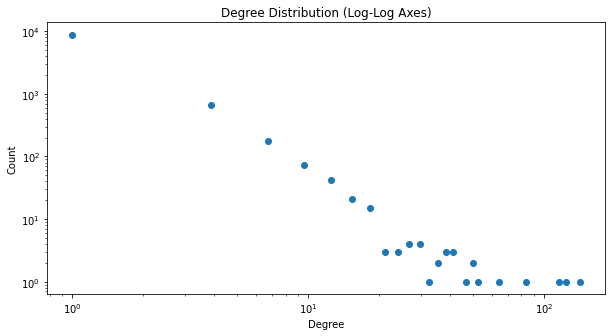

In [11]:
# Now, continue adding nodes until we have a 5000 node network
for i in range(4900):
    add_node_to_graph(G)

# Finding maximum and minimum degree
degrees = [degree for node, degree in G.degree()]
print(f"Maximum Degree: {max(degrees)}")
print(f"Minimum Degree: {min(degrees)}")

# Binning the degree distribution
hist, bin_edges = np.histogram(degrees, bins=50)

# Plotting the distribution with linear axes
plt.figure(figsize=(10, 5))
plt.bar(bin_edges[:-1], hist, width=bin_edges[1]-bin_edges[0])
plt.title("Degree Distribution (Linear Axes)")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

# Plotting the distribution with log-log axes
plt.figure(figsize=(10, 5))
plt.loglog(bin_edges[:-1], hist, 'o')
plt.title("Degree Distribution (Log-Log Axes)")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

In [20]:
def friendship_paradox(G):
    node_i = random.choice(list(G.nodes()))
    degree_i = G.degree(node_i)
    
    neighbors = list(G.neighbors(node_i))
    avg_degree_neighbors = np.mean([G.degree(neighbor) for neighbor in neighbors])
    
    return degree_i, avg_degree_neighbors

counter = 0
for i in range(1000):
    degree_i, avg_degree_neighbors = friendship_paradox(G)
    if avg_degree_neighbors > degree_i:
        counter += 1

print(f"Out of 1000 times, the friendship paradox is true {counter} times.")

Out of 1000 times, the friendship paradox is true 846 times.


In [21]:
# Building Network Without Preferential Attachment & Comparing with ER Network

# creating a nw with growth but without preferential attachment
G_non_pref = nx.Graph()
G_non_pref.add_edge(1,2)

for i in range(4998):
    new_node = max(G_non_pref.nodes())+1
    selected_node = random.choice(list(G_non_pref.nodes()))
    G_non_pref.add_edge(new_node, selected_node)

In [22]:
# Creating an ER network with same size and probability p
p_ER = 2*G.number_of_edges() / (5000 * (5000 - 1)) # from 2E/N(N-1)
G_ER = nx.erdos_renyi_graph(5000, p_ER)

In [23]:
# Checking differences
# Degree Distribution
degrees_non_pref = [degree for node, degree in G_non_pref.degree()]
degrees_ER = [degree for node, degree in G_ER.degree()]

Text(0.5, 1.0, 'Degree Distribution')

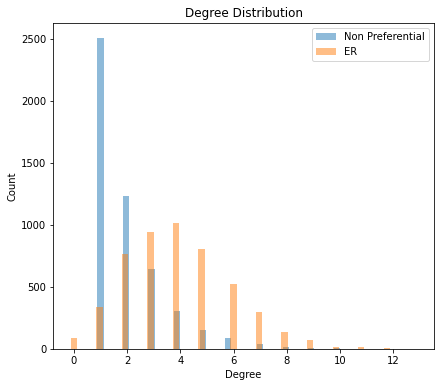

In [24]:
hist_non_pref, bin_edges_non_pref = np.histogram(degrees_non_pref, bins=50)
hist_ER, bin_edges_ER = np.histogram(degrees_ER, bins=50)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.bar(bin_edges_non_pref[:-1], hist_non_pref, width=bin_edges_non_pref[1]-bin_edges_non_pref[0], alpha=0.5, label="Non Preferential")
plt.bar(bin_edges_ER[:-1], hist_ER, width=bin_edges_ER[1]-bin_edges_ER[0], alpha=0.5, label="ER")
plt.legend()
plt.xlabel("Degree")
plt.ylabel("Count")
plt.title("Degree Distribution")

In [25]:
# Number of Connected Components
num_components_non_pref = len(list(nx.connected_components(G_non_pref)))
num_components_ER = len(list(nx.connected_components(G_ER)))

print(f"Number of Connected Components in Non Preferential Network: {num_components_non_pref}")
print(f"Number of Connected Components in ER Network: {num_components_ER}")

Number of Connected Components in Non Preferential Network: 1
Number of Connected Components in ER Network: 93


## Part 3: Configuration-model networks


The Barabasi-Albert model introduced us to the importance of degree distributions. A very important class of random graphs allows us to create networks with _any_ degree distribution of our choice. The model used for creating such networks is called the **configuration model**

> **_Video Lecture_**: [The configuration model.](https://www.dropbox.com/scl/fi/9ti390zxbf3ymnuogp6a4/ConfigurationModel.mp4?rlkey=o9jclx4j77umv0d43htcozrp4&dl=0) Link: https://www.dropbox.com/scl/fi/9ti390zxbf3ymnuogp6a4/ConfigurationModel.mp4?rlkey=o9jclx4j77umv0d43htcozrp4&dl=0
> 

In this exercise, we will write a function that lets us create configuration model networks.

> *Exercises*: Configuration-model edition.
> 
> * First, let's create a configuration-model network with 4 nodes and the degree sequence [2,2,3,3]. That is, node 0 should have degree 2, node 1 degree 2, node 2 degree 3 and node 3 degree 3. In the code block following these exercises, I have created the skeleton for a function `configuration_model` that takes a degree sequence `degrees` like this as its input. 
> * Between the comments "STEP ONE GOES HERE" and "STEP ONE ENDS HERE" in the following code block, write some code that appends the integer _i_ to the list `halfedges` _k_ times, if the array `degrees` has _k_ on its _i_ th entry. _Hint:_ I solved this with a nested `for` loop.
> * Between the comments "STEP TWO GOES HERE" and "STEP TWO ENDS HERE" write some code that shuffles the `halfedges` list. _Hint:_ you could use the numpy function `np.random.shuffle()` for this.
> * `halfedges` now contains a lot of integers. Each integer _i_ represents an halfedge that node _i_ should have in your final network. Now we are ready to form edges from these halfedges. Between the comments "STEP THREE GOES HERE" and "STEP THREE ENDS HERE", write some code that appends a tuple _(i,j)_ to the list `edgelist` for every pair _(i,j)_ where _i_ is the integer on an even-numbered entry in `halfedges` and _j_ is the integer on the odd-numbered entry following that even-numbered entry.
> * Create a networkx graph with the degree sequence [2,2,3,3] using your `configuration_model` function. Does it look like what you expect? Do you notice any peculiar things about the network you created?
> * Now create another networkx graph with 200 nodes of degree 6 using your `configuration_model` function. Confirm that all nodes have degree 6.
> * Repeat the latter two questions using the `networkx` command `nx.configuration_model()` to create the networks from degree sequences.
> * Now extract the degree sequence for one of the Barabasi-Albert model you created in the previous exercise. Create a configuration-model network with that same degree sequence. 
> * _Bonus question_: Although these two latter networks may seem very similar, there are subtle differences. Can you find any?

In [33]:
def configuration_model (degrees) :
    
    halfedges = [] # a list of halfedges
    
    # Now append integer i to `halfedges` k times if the ith entry of degrees is equal to k:
    # STEP ONE GOES HERE..
    for i, k in enumerate(degrees):
        halfedges.extend([i]*k)

    # STEP ONE ENDS HERE
    print("Check if the following ouput matches what you expect 'halfedges' to look like")
    print(halfedges)
    
    # Shuffle the list halfedges
    # STEP TWO GOES HERE..
    np.random.shuffle(halfedges)

    # STEP TWO ENDS HERE    
    
    # Append the resulting edges to the list `edgelist` as tuples 
    # [that is, append (i,j) if i and j should be connected by and edge]
    
    edgelist = [] # This will contain tuples (i,j) indicating edges between nodes i and j.    
    # STEP THREE GOES HERE..
    for i in range(0, len(halfedges), 2):
        edgelist.append((halfedges[i], halfedges[i+1]))
        
    # STEP THREE ENDS HERE    

    return edgelist #Return list of tuples indicating edges
        

Check if the following ouput matches what you expect 'halfedges' to look like
[0, 0, 1, 1, 2, 2, 2, 3, 3, 3]


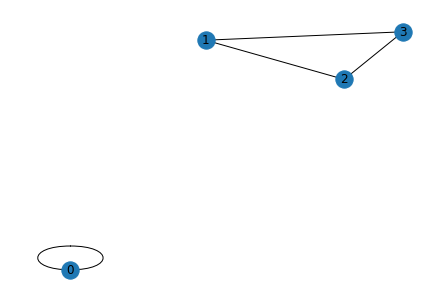

In [34]:
# Testing the function:
degrees = [2,2,3,3]
G = nx.Graph()
G.add_edges_from(configuration_model(degrees))
nx.draw(G, with_labels=True)

In [35]:
degrees_200 = [6]*200
G_200 = nx.Graph()
G_200.add_edges_from(configuration_model(degrees_200))
print("All nodes have degree 6:", all(dict(G_200.degree()).values()) == [6]*200)

Check if the following ouput matches what you expect 'halfedges' to look like
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 4

Check if the following ouput matches what you expect 'halfedges' to look like
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,

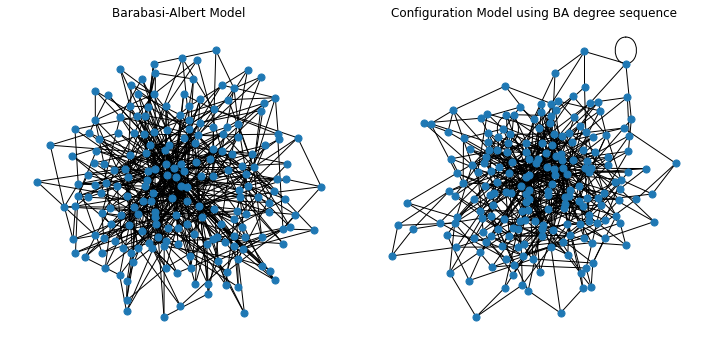

In [37]:
G_nx = nx.Graph(nx.configuration_model(degrees))
G_nx_200 = nx.Graph(nx.configuration_model(degrees_200))

# Finally, to extract the degree sequence from a Barabasi-Albert (BA) model:
# Create a Barabasi-Albert graph with 200 nodes, starting with 3 nodes, and each new node attaches to 3 existing nodes.
m0 = 3
m = 3
G_BA = nx.barabasi_albert_graph(200, m)

# Extract the degree sequence
degree_sequence = [degree for node, degree in G_BA.degree()]

# Create the configuration model network with the extracted degree sequence
G_config = nx.Graph(configuration_model(degree_sequence))

# Draw the BA graph
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
nx.draw(G_BA, node_size=50)
plt.title("Barabasi-Albert Model")

# Draw the configuration model graph
plt.subplot(1, 2, 2)
nx.draw(G_config, node_size=50)
plt.title("Configuration Model using BA degree sequence")
plt.tight_layout()
plt.show()